# Connect Four
### Catherine Wang A14394510

## Implement Environment
- If wins, gets reward +1 
- If loses, gets reward -1 
- If ties, gets reward 0 
- Actions are 1-7 for the column 
- Opponent will play based on these rules:
    1. Block agent if there is a game ending space
    2. Random column that is not already full
- Agent will be 0
- Opponent will be 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROWS = 6
COLS = 7
SIZE = 6 * 7
actions = [1, 2, 3, 4, 5, 6, 7]

In [3]:
# returns True if that column has space for at least one move, False if it does not
def validSpace(board, action):
    if board[0][action-1] == -1:
        return True
    else:
        return False

In [4]:
# returns True if board is full, False if it is not full
def isDone(board):
    for row in range(ROWS):
        for col in range(COLS):
            if board[row][col] == -1:
                return False
    return True

In [5]:
# returns True if board is board is in terminal state, False if it is not
def isTerminal(board):
    for row in range(ROWS):
        for col in range(COLS):
            if board[row][col] != -1:
                return False
    return True

In [6]:
# returns reward of +1 if agent wins, reward of -1 if opponent wins, reward of 0 if tie
def getReward(board):
    # check horizontal 
    for row in range(ROWS): # 0-6
        for col in range(COLS-3): # 0-4
            if board[row][col] == board[row][col+1] and board[row][col+1] == board[row][col+2] and board[row][col+2] == board[row][col+3] and board[row][col] != -1:
                if board[row][col] == 0: # agent wins
                    return 1
                if board[row][col] == 1: # opponent wins
                    return -1
    
    # check vertical
    for col in range(COLS): # 0-7
        for row in range(ROWS-3): # 0-4
            if board[row][col] == board[row+1][col] and board[row+1][col] == board[row+2][col] and board[row+2][col] == board[row+3][col] and board[row][col] != -1:
                if board[row][col] == 0: # agent wins
                    return 1
                if board[row][col] == 1: # opponent wins
                    return -1
    
    # check ascending
    for row in range(3, ROWS): # 3-6
        for col in range(COLS-3): # 0-4
            if board[row][col] == board[row-1][col+1] and board[row-1][col+1] == board[row-2][col+2] and board[row-2][col+2] == board[row-3][col+3] and board[row][col] != -1:
                if board[row][col] == 0: # agent wins
                    return 1
                if board[row][col] == 1: # opponent wins
                    return -1

    # check descending
    for row in range(3, ROWS): # 3-6
        for col in range(3, COLS): # 3-7
            if board[row][col] == board[row-1][col-1] and board[row-1][col-1] == board[row-2][col-2] and board[row-2][col-2] == board[row-3][col-3] and board[row][col] != -1:
                if board[row][col] == 0: # agent wins
                    return 1
                if board[row][col] == 1: # opponent wins
                    return -1
    
    # no winner found
    return 0 

In [7]:
# assumes valid space and inserts column of choice with player piece, returns the new board 
def insert(board, col, player):
    row = 0
    while board[row][col] == -1:
        row += 1
        if row == ROWS:
            break
    row -= 1
    board[row][col] = player
    
    return board

In [8]:
board = np.zeros((ROWS, COLS))
board.fill(-1)
board[5][0] = 0
board[4][0] = 0
board[3][0] = 0
board[2][0] = 0
board[1][0] = 0
board[0][0] = 0

print('Testing validSpace: \n')
print(board)
print(validSpace(board, 1))

board.fill(0)
board[0][5] = 1
board[4][6] = 1
board[2][4] = 1
board[4][3] = -1 

print('\nTesting isDone: \n')
print(board)
print(isDone(board))

board.fill(-1)
# board[3][6] = 0

print('\nTesting isTerminal: \n')
print(board)
print(isTerminal(board))

board.fill(-1)
board[2][0] = 0
board[3][1] = 1
board[4][2] = 0
board[5][3] = 0

print('\nTesting winner: \n')
print(board)
print(getReward(board))

board.fill(-1)
board[5][0] = 1
board[5][1] = 1
board[5][2] = 1

print('\nTesting insert: \n')
print(board, '\n')
print(insert(board, 3, 1), '\n')
print(insert(board, 3, 0))

Testing validSpace: 

[[ 0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1.]]
False

Testing isDone: 

[[ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
False

Testing isTerminal: 

[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]]
True

Testing winner: 

[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1.]
 [-1. -1.  0. -1. -1. -1. -1.]
 [-1. -1. -1.  0. -1. -1. -1.]]
0

Testing insert: 

[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -

In [9]:
# environment dynamics, takes in current board and action agent takes, returns the next board state and the reward
def step(board, action):
    # insert agent's move into board
    board = insert(board, action - 1, 0)
    
    reward = 0
    block = False
    # check if done after agent's move
    if getReward(board) != 0 or isDone(board): # return terminal state
        reward = getReward(board)
        board = np.zeros((ROWS, COLS))
        board.fill(-1)
        return board, reward 
    
    # opponent's turn
    for col in range(COLS): # blocks opponent right before they win
        tempBoard = board.copy()
        if validSpace(tempBoard, col):
            tempBoard = insert(tempBoard, col, 0)
            if getReward(tempBoard) == 1 and validSpace(board, col):
                    board = insert(board, col, 1)
                    block = True
                    break
    if block == False: # otherwise, pick random column 
        move = np.random.randint(1, 8)
        while validSpace(board, move) == False:
            move = np.random.randint(1, 8)
        board = insert(board, move - 1, 1)
    if getReward(board) != 0 or isDone(board): # return terminal state
        reward = getReward(board)
        board = np.zeros((ROWS, COLS))
        board.fill(-1)
        return board, reward 
    
    reward = getReward(board)
    return board, reward

# Project 2 Checkpoint 2

In [10]:
print('Testing step function that represent the dynamics of the environment: \n')
board = np.zeros((ROWS, COLS))
board.fill(-1)

print('board: \n', board, 'action: ', 2)
board, reward = step(board, 2)
print('board: \n', board, ' reward: ', reward, '\n')

print('board: \n', board, 'action: ', 3)
board, reward = step(board, 3)
print('board: \n', board, ' reward: ', reward, '\n')

print('board: \n', board, 'action: ', 4)
board, reward = step(board, 4)
print('board: \n', board, ' reward: ', reward, '\n')

print('board: \n', board, 'action: ', 5)
board, reward = step(board, 5)
print('board: \n', board, ' reward: ', reward, '\n')

print('board: \n', board, 'action: ', 5)
board, reward = step(board, 5)
print('board: \n', board, ' reward: ', reward, '\n')

print('Environment for when agent wins: ')
board.fill(-1)
board[5][1] = 0
board[5][2] = 0
board[5][3] = 0
board[5][4] = 0

print('board: \n', board, 'reward: ', getReward(board), '\n')

print('Environment for when opponent wins: ')
board.fill(-1)
board[5][3] = 1
board[4][3] = 1
board[3][3] = 1
board[2][3] = 1

print('board: \n', board, 'reward: ', getReward(board))

print('board shape: ', board.shape)

Testing step function that represent the dynamics of the environment: 

board: 
 [[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]] action:  2
board: 
 [[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1.  0. -1.  1. -1. -1. -1.]]  reward:  0 

board: 
 [[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1.  0. -1.  1. -1. -1. -1.]] action:  3
board: 
 [[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 1.  0.  0.  1. -1. -1. -1.]]  reward:  0 

board: 
 [[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -

# Project 2 Checkpoint 3

In [11]:
# generates plot to show the performance of the learning agent
def evaluate(q_values, num_games):
    agent_wins = []
    opponent_wins = []
    draws = []
    count = []
    for x in range(len(q_values)):
        q = q_values[x]
        board = np.zeros((ROWS, COLS))
        board.fill(-1)
        action = 4 # np.random.randint(1, 8)
        agent = 0
        opponent = 0
        draw = 0
        
        for i in range(1, num_games+1):
            while True:
                next_board, reward = step(board, action)
                action = np.argmax(q.get(str(next_board))) + 1
                if isTerminal(next_board) == True:
                    if reward == 1: 
                        agent += 1
                    if reward == -1: 
                        opponent += 1
                    if reward == 0: 
                        draw += 1
                    break
                board = next_board
        agent_wins.append(agent/num_games)
        opponent_wins.append(opponent/num_games)
        draws.append(draw/num_games)
        count.append(x)
                
    plt.plot(count, draws, 'g-', label='Draw')
    plt.plot(count, agent_wins, 'r-', label='Agent Wins')
    plt.plot(count, opponent_wins, 'b-', label='Opponent Wins')
    plt.legend()
    plt.xlabel('Episode')
    plt.ylabel('Win Percentage')
    return

## Q-Learning

In [12]:
def ep_QLearning(q_values, alpha, gamma, epsilon, max_steps):
    steps = max_steps
    # initialize state
    board = np.zeros((ROWS, COLS))
    board.fill(-1)
    
    for t in range(max_steps):
        # select action with epsilon-greedy
        if np.random.uniform(0, 1) < epsilon or type(q_values.get(str(board))) == None:
            action = np.random.randint(1, 8)
            while validSpace(board, action) == False:
                action = np.random.randint(1, 8)
        else:
            action = np.argmax(q_values.get(str(board))) + 1
        
        # get next board state and reward
        next_board, reward = step(board, action)

        # update q learning
        board_arr = q_values.setdefault(str(board), np.zeros(len(actions)))
        next_board_arr = q_values.setdefault(str(board), np.zeros(len(actions)))
        board_arr[action-1] = board_arr[action-1] + alpha*(reward + gamma*(np.amax(next_board_arr) - board_arr[action-1]))
        q_values.update({str(board): board_arr})
        
        # break if episode ended and the board is terminal state
        if isTerminal(next_board):
            steps = t
            break
            
        board = next_board
    
    return q_values, steps

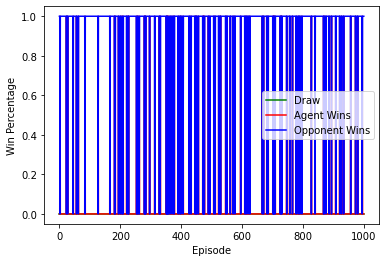

In [13]:
alpha = 0.1 # learning rate not too fast or too slow
gamma = 0.9 # we want to give equal importance to future rewards and immediate rewards
epsilon = 0.05
max_steps = 25

n_eps = 1000
n_experiments = 1

steps_per_ep = np.zeros((n_experiments, n_eps))
q_values = dict() # key is string of board, value is an array of length 7 for each action
q_values_ev = []

for i in range(n_experiments):
    for j in range(n_eps):
        q_values, steps = ep_QLearning(q_values, alpha, gamma, epsilon, max_steps)
        steps_per_ep[i, j] = steps
        q_values_ev.append(q_values)

evaluate(q_values_ev, 200)

Text(0.5, 0, 'Episodes')

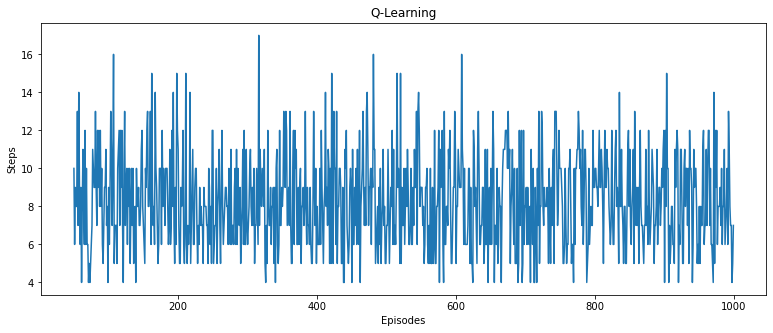

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))

ax.plot(range(50,1000), np.mean(steps_per_ep[:,50:1000], axis=(0)).T)

ax.title.set_text("Q-Learning")
ax.set_ylabel("Steps")
ax.set_xlabel("Episodes")

## Dyna-Q

In [15]:
def convert(strBoard):
    board = []
    for i in range(len(strBoard)):
        if strBoard[i].isnumeric():
            board.append(int(strBoard[i]))
    board = np.array(board).reshape((ROWS, COLS))
    return board

In [16]:
print('Testing convert:')
board = np.zeros((ROWS, COLS))
board.fill(-1)
strBoard = str(board)
convert(strBoard)

Testing convert:


array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

In [23]:
def ep_dynaQ(q_values, model, alpha, gamma, epsilon, n_planning_steps, max_steps):
    steps = max_steps
    # initialize state
    board = np.zeros((ROWS, COLS))
    board.fill(-1)
    
    for t in range(max_steps):
        # select action with epsilon-greedy
        if np.random.uniform(0, 1) < epsilon or type(q_values.get(str(board))) == None:
            action = np.random.randint(1, 8)
            while validSpace(board, action) == False:
                action = np.random.randint(1, 8)
        else:
            action = np.argmax(q_values.get(str(board))) + 1
        
        # get next board state and reward
        next_board, reward = step(board, action)
        
        # store next board state and reward in model dictionary
        model.update({(str(board), action): (str(next_board), reward)})
        
        # update q learning
        board_arr = q_values.setdefault(str(board), np.zeros(len(actions)))
        next_board_arr = q_values.setdefault(str(board), np.zeros(len(actions)))
        board_arr[action-1] = board_arr[action-1] + alpha*(reward + gamma*(np.amax(next_board_arr) - board_arr[action-1]))
        q_values.update({str(board): board_arr})
        
        # iterate over the n planning steps
        for k in range(n_planning_steps):
            # array of candidate states we update
            cand = list(model.keys())
            i = np.random.randint(len(cand))
            board_p = convert(cand[i][0]) # convert string board back to array board
            action_p = cand[i][1]
            
            # get next board state and reward
            next_board_p, reward_p = step(board_p, action_p)
            
            # update q learning
            board_arr_p = q_values.setdefault(str(board_p), np.zeros(len(actions)))
            next_board_arr_p = q_values.setdefault(str(next_board_p), np.zeros(len(actions)))
            board_arr_p[action-1] = board_arr_p[action-1] + alpha*(reward + gamma*(np.amax(next_board_arr_p) - board_arr_p[action-1]))
            q_values.update({str(board): board_arr_p})
        
        # break if episode ended and the board is terminal state
        if isTerminal(next_board):
            steps = t
            break
        
        board = next_board
        
    return q_values, model, steps 

In [ ]:
alpha = 0.1 # learning rate not too fast or too slow
gamma = 0.9 # we want to give equal importance to future rewards and immediate rewards, closer to 1 is future rewards
epsilon = 0.05
n_planning_steps = 20 # used to be 5, 6-10
max_steps = 25

n_eps = 1000
n_experiments = 1

steps_per_ep = np.zeros((n_experiments, n_eps))
q_values = dict() # key is string of board, value is an array of length 7 for each action
model = dict() # key is tuple (state, action) and value is tuple (next state, reward)
q_values_ev = []

for i in range(n_experiments): 
    for j in range(n_eps): 
        q_values, model, steps = ep_dynaQ(q_values, model, alpha, gamma, epsilon, n_planning_steps, max_steps)
        steps_per_ep[i, j] = steps
        q_values_ev.append(q_values)

evaluate(q_values_ev, 200)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))

ax.plot(range(0,1000), np.mean(steps_per_ep[:,0:1000], axis=(0)).T, label = str(n_planning_steps) + " planning steps" )
    
ax.legend()
ax.title.set_text("Dyna-Q")
ax.set_ylabel("Steps")
ax.set_xlabel("Episodes")